# Plotting for part two in project 1


In [1]:
# imports
import matplotlib.pyplot as plt
from matplotlib import cm

from matplotlib.ticker import MaxNLocator

import numpy as np
import imageio.v2 as imageio

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

import importlib
import general_functions
importlib.reload(general_functions)
from general_functions import *

import plotting_functions
importlib.reload(plotting_functions)
from plotting_functions import *

# Suppress ConvergenceWarning and LinAlgWarning
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)  # This covers LinAlg warnings

import scienceplots
# plt.style.use(['science', 'ieee'])
# plt.rcParams.update({'figure.dpi': '100'})
plt.style.use('ggplot')

np.random.seed(0)

## MSE and R2 for OLS, Ridge and Lasso

In [2]:
### CHANGE THIS TO DIRECTORY CONTAINING DATASET ###
filename = '../datasets/SRTM_data_Norway_1.tif' 

In [ ]:
N = 500 # restrict area of terrain data
down_sample = 20 # down sample terrain data (total data points = (N/down_sample)^2)
order = 5
max_degree = 30
lambdas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
mse_ols, r2_ols = scores_deg(OLS, N, max_degree, filename=filename, down_sample=down_sample)
mse_ridge, r2_ridge = scores_lambda(RidgeRegression, N, order, lambdas,filename=filename, down_sample=down_sample)
mse_lasso, r2_lasso = scores_lambda(LassoRegression, N, order, lambdas,filename=filename, down_sample=down_sample)

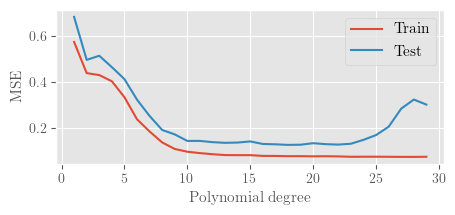

In [29]:
# ols mse
fig, ax = make_plot(2, 1)
plt.plot(range(1, max_degree), [mse[0] for mse in mse_ols], label='Train')
plt.plot(range(1, max_degree), [mse[1] for mse in mse_ols], label='Test')
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')
plt.legend()
plt.savefig('../figures/ols_mse_terrain_maxdeg25.pdf', bbox_inches='tight')
plt.show()

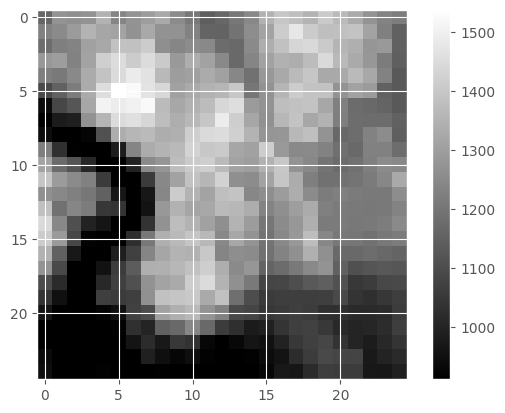

In [4]:
X, Y, Z, D = create_terrain_data(filename=filename, N=500, down_sample=20, m=order)
plt.imshow(Z, cmap='gray')
plt.colorbar()
plt.show()

In [5]:
Z.shape

(25, 25)

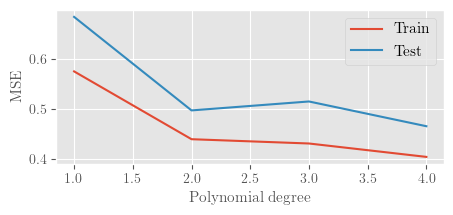

In [28]:
N = 500 # restrict area of terrain data
down_sample = 20 # down sample terrain data (total data points = (N/down_sample)^2)
order = 5
max_degree = 5
lambdas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
mse_ols, r2_ols = scores_deg(OLS, N, max_degree, filename=filename, down_sample=down_sample)
mse_ridge, r2_ridge = scores_lambda(RidgeRegression, N, order, lambdas,filename=filename, down_sample=down_sample)
mse_lasso, r2_lasso = scores_lambda(LassoRegression, N, order, lambdas,filename=filename, down_sample=down_sample)
# ols mse
fig, ax = make_plot(2, 1)
plt.plot(range(1, max_degree), [mse[0] for mse in mse_ols], label='Train')
plt.plot(range(1, max_degree), [mse[1] for mse in mse_ols], label='Test')
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')
plt.legend()
plt.savefig('../figures/ols_mse_terrain.pdf', bbox_inches='tight')
plt.show()

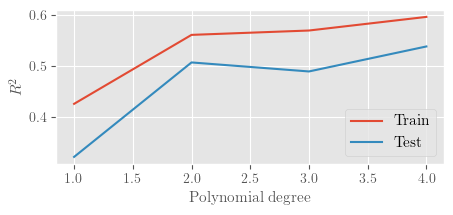

In [27]:
# ols r2
fig, ax = make_plot(2, 1)
plt.plot(range(1, max_degree), [r2[0] for r2 in r2_ols], label='Train')
plt.plot(range(1, max_degree), [r2[1] for r2 in r2_ols], label='Test')
plt.xlabel('Polynomial degree')
plt.ylabel(r'$R^2$')
plt.legend()
plt.savefig('../figures/ols_r2_terrain.pdf', bbox_inches='tight')
plt.show()

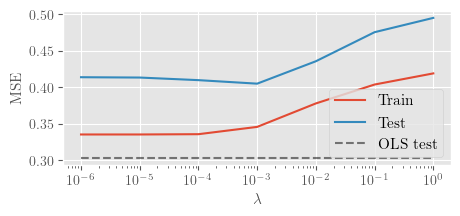

In [8]:
# ridge mse
fig, ax = make_plot(2, 1)
plt.semilogx(lambdas, [mse[0] for mse in mse_ridge], label='Train')
plt.semilogx(lambdas, [mse[1] for mse in mse_ridge], label='Test')
plt.hlines(y=mse_ols[-1][1], xmin=lambdas[0], xmax=lambdas[-1], color='black', linestyle='--', label='OLS test', alpha=0.5)
plt.xlabel(r'$\lambda$')
plt.ylabel('MSE')
plt.legend()
plt.savefig('../figures/ridge_mse_terrain.pdf', bbox_inches='tight')
plt.show()


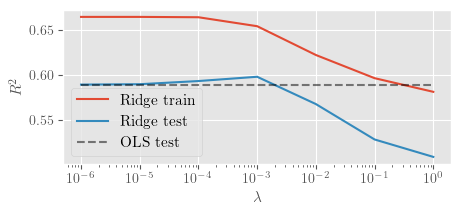

In [9]:
# ridge r2
fig, ax = make_plot(2, 1)
plt.semilogx(lambdas, [r2[0] for r2 in r2_ridge], label='Ridge train')
plt.semilogx(lambdas, [r2[1] for r2 in r2_ridge], label='Ridge test')
plt.hlines(r2_ols[order-1][1],lambdas[0], lambdas[-1], color='k', linestyle='--', label='OLS test', alpha=0.5)
plt.ylabel(r'$R^2$')
plt.xlabel(r'$\lambda$')
plt.legend()
plt.savefig('../figures/ridge_r2_terrain.pdf', bbox_inches='tight')
plt.show()

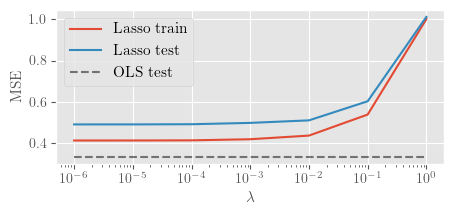

In [10]:
# lasso mse
fig, ax = make_plot(2, 1)
plt.semilogx(lambdas, [mse[0] for mse in mse_lasso], label='Lasso train')
plt.semilogx(lambdas, [mse[1] for mse in mse_lasso], label='Lasso test')
plt.hlines(mse_ols[order-1][0],lambdas[0], lambdas[-1], color='k', linestyle='--', label='OLS test', alpha=0.5)
plt.ylabel('MSE')
plt.xlabel(r'$\lambda$')
plt.legend()
plt.savefig('../figures/lasso_mse_terrain.pdf', bbox_inches='tight')
plt.show()


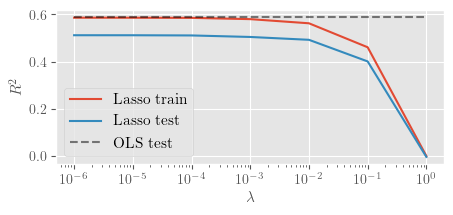

In [11]:
# lasso r2
fig, ax = make_plot(2, 1)
plt.semilogx(lambdas, [r2[0] for r2 in r2_lasso], label='Lasso train')
plt.semilogx(lambdas, [r2[1] for r2 in r2_lasso], label='Lasso test')
plt.hlines(r2_ols[order-1][1],lambdas[0], lambdas[-1], color='k', linestyle='--', label='OLS test', alpha=0.5)
plt.ylabel(r'$R^2$')
plt.xlabel(r'$\lambda$')
plt.legend()
plt.savefig('../figures/lasso_r2_terrain.pdf', bbox_inches='tight')
plt.show()


## Plotting the beta values

In [12]:
N = 500 # restrict area of terrain data
down_sample = 20 # down sample terrain data (total data points = (N/down_sample)^2)
order = 5
max_degree = 15
lambdas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
filename = '../datasets/SRTM_data_Norway_1.tif'

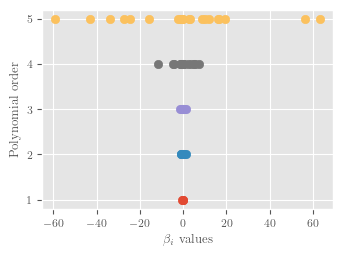

In [13]:
# plot_betas_OLS_for_polydeg(N, max_degree, savefile=None, filename=filename)
plot_betas_OLS_for_polydeg_terrain(N, max_degree, savefile='../figures/ols_betas_terrain.pdf', filename=filename)

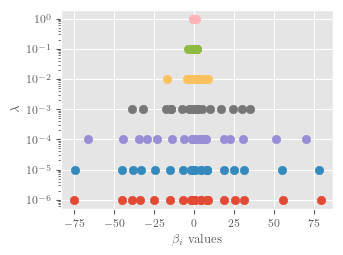

In [14]:
plot_betas_for_lmb_terrain(RidgeRegression, N, down_sample, order, lambdas, savefile='../figures/ridge_betas_terrain.pdf', filename=filename)

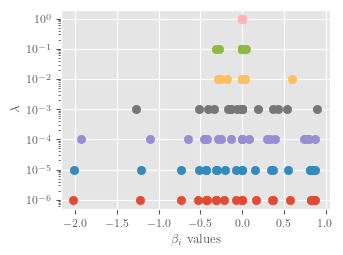

In [15]:
plot_betas_for_lmb_terrain(LassoRegression, N, down_sample, order, lambdas, savefile='../figures/lasso_betas_terrain.pdf', filename=filename)

## Bias variance tradeoff

In [16]:
N = 500 # restrict area of terrain data
down_sample = 20 # down sample terrain data (total data points = (N/down_sample)^2)
order = 5
max_degree = 15

degrees = np.arange(1, 16)
n_bootstraps = 100
n_samples = 200

n_splits = 10
max_order = 15
order = 10
lmb = 0.01

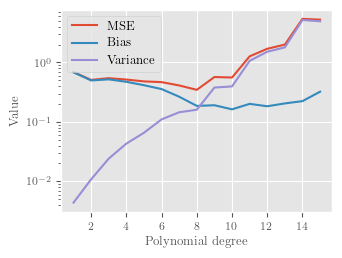

In [17]:
# bias variance tradeoff on different degrees
# errors, biases, variances = bootstrap_OLS_degrees(N, n_bootstraps, n_samples, degrees, noise_eps=noise_eps, filename=filename, down_sample=down_sample)
errors, biases, variances = bootstrap_OLS_degrees(N, n_bootstraps, n_samples, degrees, filename=filename, down_sample=down_sample)
plot_bias_variance_tradeoff_ols(degrees, errors, biases, variances, x_label='Polynomial degree', show=True, filename='../figures/bias_var_ols_deg_terrain.pdf')

In [18]:
down_samples = np.flip(np.arange(0, 41, 10))
down_samples[-1] = 1

In [19]:
n_points = N / down_samples

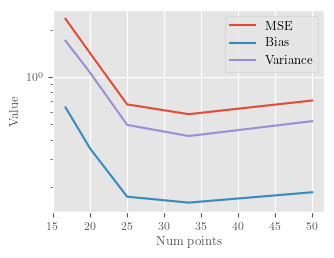

In [20]:
# bias variance tradeoff on different number of points
# down_samples = np.flip(np.arange(0, 41, 10))
# down_samples[-1] = 1
down_samples = np.array([30, 25, 20, 15, 10])
n_points = N / down_samples
errors, biases, variances = bootstrap_OLS_npoints_terrain(N, down_samples, n_bootstraps, n_samples, order, filename=filename)
plot_bias_variance_tradeoff_ols(n_points, errors, biases, variances, x_label='Num points', show=True, filename='../figures/bias_var_ols_npoints_terrain.pdf', logx=False)

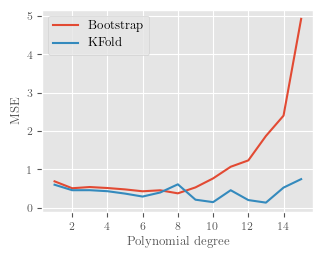

In [22]:
n_bootstraps = 100
n_samples = 200
n_splits = 10

plot_MSE_boot_kfold(N, max_order, n_bootstraps, n_samples, n_splits, noise_eps=None, model_type='OLS', savefile='../figures/ols_boot_kfold_comp_terrain.pdf', filename=filename, down_sample=down_sample)


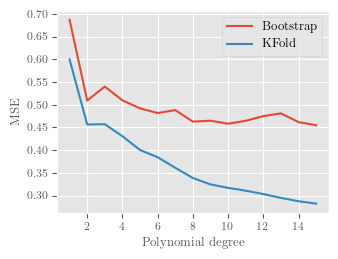

In [23]:
plot_MSE_boot_kfold(N, max_order, n_bootstraps, n_samples, n_splits, noise_eps=None, model_type='Ridge', savefile='../figures/ridge_boot_kfold_comp_terrain.pdf', filename=filename, down_sample=down_sample)


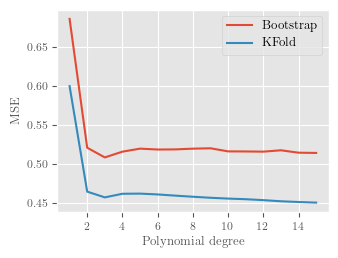

In [24]:
plot_MSE_boot_kfold(N, max_order, n_bootstraps, n_samples, n_splits, noise_eps=None, model_type='Lasso', savefile='../figures/lasso_boot_kfold_comp_terrain.pdf', filename=filename, down_sample=down_sample)


## Grid search and final plot of best parameters

# plot the terrain data


In [86]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

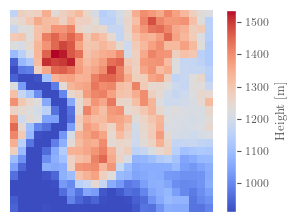

In [41]:

plot_terrain_for_methsects(N=500, down_sample=20)

In [128]:
X, Y, Z, D = create_terrain_data(filename=filename, N=500, down_sample=20, m=30)

In [129]:
D_train, D_test, Z_train, Z_test = split_data(D, Z, test_size=0.2, scaled=True)
beta, pred_train, pred_test = OLS(D_train, D_test, Z_train)
pred = D @ beta
mse_ols = mean_squared_error(Z_test, pred_test)

In [130]:
beta_ridge, pred_train_ridge, pred_test_ridge = RidgeRegression(D_train, D_test, Z_train, lmb=1e-6)
pred_ridge = D @ beta_ridge
mse_ridge = mean_squared_error(Z_test, pred_test_ridge)

In [131]:
# do the same for lasso
beta_lasso, pred_train_lasso, pred_test_lasso = LassoRegression(D_train, D_test, Z_train, lmb=1e-6)
pred_lasso = D @ beta_lasso
mse_lasso = mean_squared_error(Z_test, pred_test_lasso)

Text(0.5, 1.0, 'MSE = 0.44')

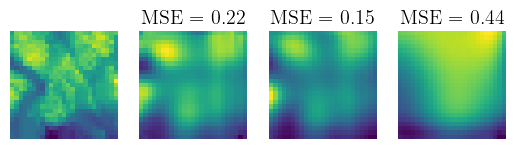

In [132]:
plt.subplot(1, 4, 1)
plt.imshow(StandardScaler().fit_transform(Z))
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(pred.reshape(Z.shape))
plt.axis('off')
plt.title(f'MSE = {mse_ols:.2f}')
plt.subplot(1, 4, 3)
plt.imshow(pred_ridge.reshape(Z.shape))
plt.axis('off')
plt.title(f'MSE = {mse_ridge:.2f}')
plt.subplot(1, 4, 4)
plt.imshow(pred_lasso.reshape(Z.shape))
plt.axis('off')
plt.title(f'MSE = {mse_lasso:.2f}')

In [168]:
np.var(StandardScaler().fit_transform(Z))

1.0

Using digital terrain data
Processing model degree: 1
Processing model degree: 2
Processing model degree: 3
Processing model degree: 4
Processing model degree: 5
Processing model degree: 6
Processing model degree: 7
Processing model degree: 8
Processing model degree: 9
Processing model degree: 10
Processing model degree: 11
Processing model degree: 12
Processing model degree: 13
Processing model degree: 14
Processing model degree: 15


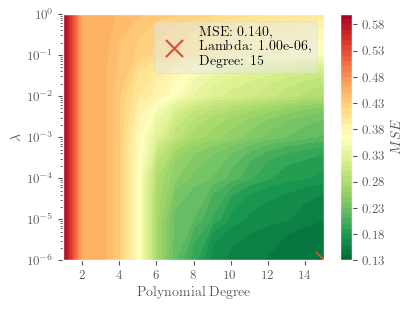

In [42]:
polydeg_lmb_grid_seach(model_type='Ridge',
                        N=500,
                        down_sample=20,
                        noise_eps=None,
                        lmb_n=7,
                        lmb_min=-6,
                        lmb_max=0,
                        mindeg=1,
                        maxdeg=15,
                        k_folds=5,
                        terrain_data=True,
                        show=True,
                        save=True)

Using digital terrain data
Processing model degree: 1
Processing model degree: 2
Processing model degree: 3
Processing model degree: 4
Processing model degree: 5
Processing model degree: 6
Processing model degree: 7
Processing model degree: 8
Processing model degree: 9
Processing model degree: 10
Processing model degree: 11
Processing model degree: 12
Processing model degree: 13
Processing model degree: 14
Processing model degree: 15


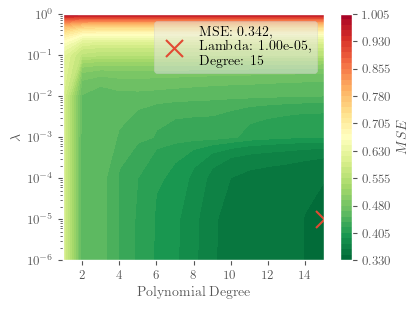

In [43]:
polydeg_lmb_grid_seach(model_type='Lasso',
                        N=500,
                        down_sample=20,
                        noise_eps=None,
                        lmb_n=7,
                        lmb_min=-6,
                        lmb_max=0,
                        mindeg=1,
                        maxdeg=15,
                        k_folds=10,
                        terrain_data=True,
                        show=True,
                        save=True)

In [190]:
# Plot the terrain data for the best parameters found
# Original data
# Split data for OLS with order 8
X, Y, Z, D = create_terrain_data(filename=filename, N=500, down_sample=20, m=8)
D_train, D_test, Z_train, Z_test = split_data(D, Z, test_size=0.2, scaled=False)
beta, pred_train, pred_test = OLS(D_train, D_test, Z_train)
pred_ols = (D @ beta).reshape(Z.shape)
mse_ols = mean_squared_error(Z_test, pred_test)

# Split data for Ridge and Lasso with order 15
X, Y, Z, D = create_terrain_data(filename=filename, N=500, down_sample=20, m=15)
D_train, D_test, Z_train, Z_test = split_data(D, Z, test_size=0.2, scaled=False)

# Ridge with lmb=1e-6
beta_ridge, pred_train_ridge, pred_test_ridge = RidgeRegression(D_train, D_test, Z_train, lmb=1e-6)
pred_ridge = (D @ beta_ridge).reshape(Z.shape)
mse_ridge = mean_squared_error(Z_test, pred_test_ridge)

# Lasso with lmb=1e-5
beta_lasso, pred_train_lasso, pred_test_lasso = LassoRegression(D_train, D_test, Z_train, lmb=1e-5)
pred_lasso = (D @ beta_lasso).reshape(Z.shape)
mse_lasso = mean_squared_error(Z_test, pred_test_lasso)


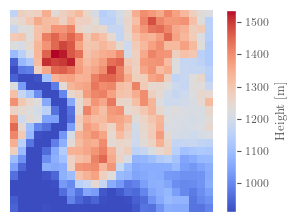

In [193]:
# Plot the terrain data 
fig, ax = make_plot(1, 1)
plt.imshow(Z, cmap='coolwarm')
plt.axis('off')
cbar = plt.colorbar()
cbar.set_label('Height [m]')
plt.savefig('../figures/terrain_dat_no_scale.pdf', bbox_inches='tight')
plt.show()

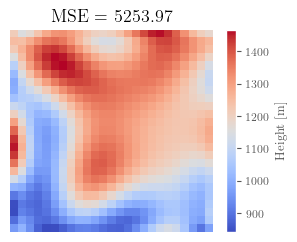

In [194]:
# plot ols results
fig, ax = make_plot(1, 1)
plt.imshow(pred_ols, cmap='coolwarm')
plt.axis('off')
plt.title(f'MSE = {mse_ols:.2f}')
cbar = plt.colorbar()
cbar.set_label('Height [m]')
plt.savefig('../figures/terrain_dat_ols_no_scale.pdf', bbox_inches='tight')
plt.show()


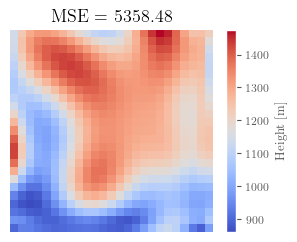

In [195]:
# plot ridge results
fig, ax = make_plot(1, 1)
plt.imshow(pred_ridge, cmap='coolwarm')
plt.axis('off')
plt.title(f'MSE = {mse_ridge:.2f}')
cbar = plt.colorbar()
cbar.set_label('Height [m]')
plt.savefig('../figures/terrain_dat_ridge_no_scale.pdf', bbox_inches='tight')
plt.show()


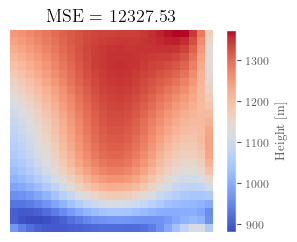

In [196]:
# Plot lasse results
fig, ax = make_plot(1, 1)
plt.imshow(pred_lasso, cmap='coolwarm')
plt.axis('off')
plt.title(f'MSE = {mse_lasso:.2f}')
cbar = plt.colorbar()
cbar.set_label('Height [m]')
plt.savefig('../figures/terrain_dat_lasso_no_scale.pdf', bbox_inches='tight')
plt.show()


In [197]:
# repeat with scaling
X, Y, Z, D = create_terrain_data(filename=filename, N=500, down_sample=20, m=8)
D_train, D_test, Z_train, Z_test = split_data(D, Z, test_size=0.2, scaled=True)
beta, pred_train, pred_test = OLS(D_train, D_test, Z_train)
pred_ols = (D @ beta).reshape(Z.shape)
mse_ols = mean_squared_error(Z_test, pred_test)

# Split data for Ridge and Lasso with order 15
X, Y, Z, D = create_terrain_data(filename=filename, N=500, down_sample=20, m=15)
D_train, D_test, Z_train, Z_test = split_data(D, Z, test_size=0.2, scaled=True)

# Ridge with lmb=1e-6
beta_ridge, pred_train_ridge, pred_test_ridge = RidgeRegression(D_train, D_test, Z_train, lmb=1e-6)
pred_ridge = (D @ beta_ridge).reshape(Z.shape)
mse_ridge = mean_squared_error(Z_test, pred_test_ridge)

# Lasso with lmb=1e-5
beta_lasso, pred_train_lasso, pred_test_lasso = LassoRegression(D_train, D_test, Z_train, lmb=1e-5)
pred_lasso = (D @ beta_lasso).reshape(Z.shape)
mse_lasso = mean_squared_error(Z_test, pred_test_lasso)

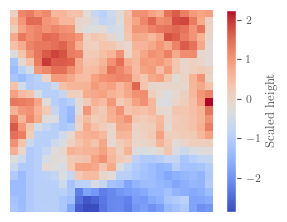

In [203]:
# Plot the terrain data
fig, ax = make_plot(1, 1)
plt.imshow(StandardScaler().fit_transform(Z), cmap='coolwarm')
plt.axis('off')
cbar = plt.colorbar()
cbar.set_label('Scaled height')
plt.savefig('../figures/terrain_dat_scale.pdf', bbox_inches='tight')
plt.show()


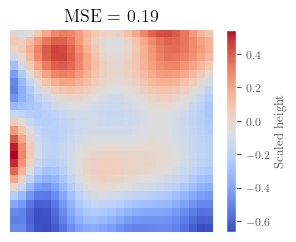

In [204]:
# plot ols results
fig, ax = make_plot(1, 1)
plt.imshow(pred_ols, cmap='coolwarm')
plt.axis('off')
plt.title(f'MSE = {mse_ols:.2f}')
cbar = plt.colorbar()
cbar.set_label('Scaled height')
plt.savefig('../figures/terrain_dat_ols_scale.pdf', bbox_inches='tight')
plt.show()


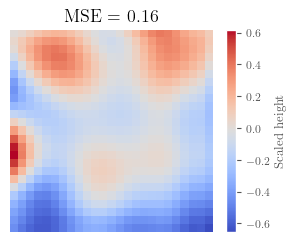

In [205]:
# ridge results
fig, ax = make_plot(1, 1)
plt.imshow(pred_ridge, cmap='coolwarm')
plt.axis('off')
plt.title(f'MSE = {mse_ridge:.2f}')
cbar = plt.colorbar()
cbar.set_label('Scaled height')
plt.savefig('../figures/terrain_dat_ridge_scale.pdf', bbox_inches='tight')
plt.show()


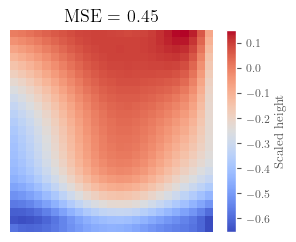

In [206]:
# lasso results
fig, ax = make_plot(1, 1)
plt.imshow(pred_lasso, cmap='coolwarm')
plt.axis('off')
plt.title(f'MSE = {mse_lasso:.2f}')
cbar = plt.colorbar()
cbar.set_label('Scaled height')
plt.savefig('../figures/terrain_dat_lasso_scale.pdf', bbox_inches='tight')
plt.show()
